In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
#%matplotlib widget

In [3]:
def func(x, a, b, d):
    return a*x**2 + b*x + d

In [4]:
# Leggi i dati dal file di testo
data = np.loadtxt('Harm2ferm2D_Node.quad_error_K0.16_Nw10000_T315.txt')

# Estrai le colonne
c = data[:,0]/np.sqrt(0.4)
energy = data[:,1]/0.4
errorbar = data[:,2]/0.4

# Valore costante per E_0
E_0 = 3
a=0.20284
b=-0.000789709
d=1.19912

<Figure size 640x480 with 0 Axes>

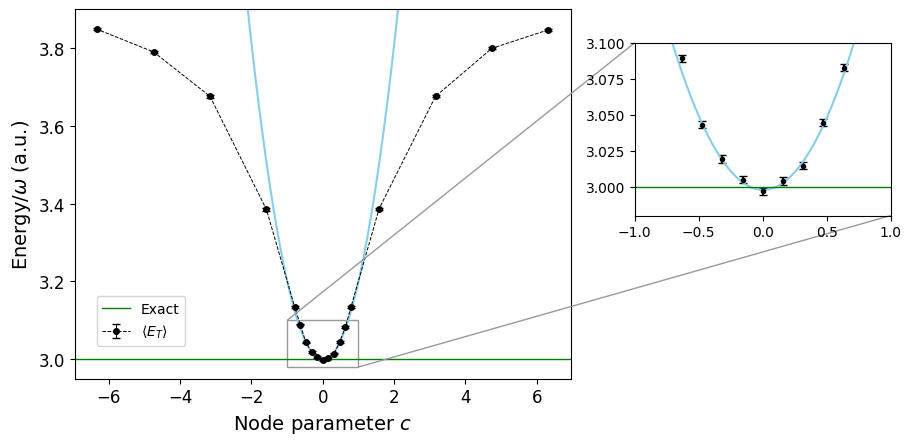

In [5]:
plt.clf()
# Crea la figura e gli assi
fig, ax = plt.subplots()

# Plotta i dati principali
ax.errorbar(c, energy, errorbar, fmt='ko--', label=r'$\left< E_{T} \right>$', markersize=4, capsize=3, lw=0.7)
plt.plot(np.linspace(-3,3,500), func(np.linspace(-3,3,500)*np.sqrt(0.4),a,b,d)/0.4, color='skyblue')
ax.set_ylim(top = 3.9)
ax.set_ylim(bottom = 2.95)
ax.axhline(y=E_0, color='green', linestyle='-', linewidth=1, label='Exact')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Ingrandimento della regione iniziale
ax_inset = fig.add_axes([1, 0.45, 0.4, 0.36])
ax_inset.errorbar(c, energy, errorbar, fmt='ko', markersize=3, capsize=3)
plt.plot(np.linspace(-3,3,500), func(np.linspace(-3,3,500)*np.sqrt(0.4),a,b,d)/0.4, color='skyblue')
ax_inset.set_xlim(-1, 1)
ax_inset.set_ylim(2.98, 3.1)
ax_inset.axhline(y=E_0, color='green', linestyle='-', linewidth=1)
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.6")

# Aggiungi etichette e legende
ax.set_xlabel('Node parameter $c$', fontsize=14)
ax.set_ylabel('Energy$/\\omega$ (a.u.)', fontsize=14)
ax.legend(loc='lower left', bbox_to_anchor=(0.03, 0.07))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#fig.tight_layout()
#ax_inset.legend(loc='upper right')

# Mostra la figura
plt.show()

In [6]:
plt.savefig('Harm2ferm2D_Node.quad_error_K0.16_Nw10000_T315_plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>